In [ ]:
import pandas as pd

trainset = pd.read_csv("trainset.csv")

trainset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900


In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
train = trainset.drop("Date", axis=1)
col = train.columns
train_scale = sc.fit_transform(train)
train_scale = pd.DataFrame(train_scale, columns=col)
train_scale

,Open,High,Low,Close,Adj Close,Volume
0,0.010111,0.014778,0.014549,0.013907,0.013907,0.219444
1,0.013886,0.018142,0.017434,0.014194,0.014194,0.200153
2,0.016907,0.024651,0.022250,0.023952,0.023952,0.238662
3,0.021093,0.023225,0.024256,0.021755,0.021755,0.142856
4,0.021155,0.021123,0.020001,0.020765,0.020765,0.144617
...,...,...,...,...,...,...
1254,0.980569,0.980373,0.994276,0.976620,0.976620,0.032103
1255,0.976377,0.974770,0.981408,0.971977,0.971977,0.032339
1256,0.975440,0.972366,0.978413,0.961853,0.961853,0.054307
1257,0.967455,0.967395,0.973845,0.960164,0.960164,0.035626


In [ ]:
x_train = []
y_train = []

In [ ]:
import numpy as np

In [ ]:
for i in range(60,1259):
    x_train.append(train_scale.iloc[i-60:i,:].values)
    y_train.append(train_scale.iloc[i,0])
#x_train,y_train = np.array(x_train),np.array(y_train)

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train.shape

(1199, 60, 6)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
regressor = Sequential()
regressor.add(LSTM(units = 50,return_sequences = True,input_shape = (x_train.shape[1],6)))

In [ ]:
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [ ]:
regressor.fit(x_train,y_train,epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 14s 135ms/step - loss: 0.0246
Epoch 2/100
38/38 [==============================] - 5s 128ms/step - loss: 0.0049
Epoch 3/100
38/38 [==============================] - 5s 128ms/step - loss: 0.0040
Epoch 4/100
38/38 [==============================] - 5s 127ms/step - loss: 0.0040
Epoch 5/100
38/38 [==============================] - 5s 126ms/step - loss: 0.0035
Epoch 6/100
38/38 [==============================] - 5s 130ms/step - loss: 0.0041
Epoch 7/100
38/38 [==============================] - 5s 131ms/step - loss: 0.0031
Epoch 8/100
38/38 [==============================] - 5s 128ms/step - loss: 0.0040
Epoch 9/100
38/38 [==============================] - 5s 125ms/step - loss: 0.0031
Epoch 10/100
38/38 [==============================] - 5s 125ms/step - loss: 0.0028
Epoch 11/100
38/38 [==============================] - 5s 130ms/step - loss: 0.0035
Epoch 12/100
38/38 [==============================] - 5s 127ms/step - loss: 0.0031
Epoch 13/100

In [ ]:
dataset_test =pd.read_csv("testset.csv")

In [ ]:
test = dataset_test.drop("Date", axis=1)
col = test.columns
test_scale = sc.fit_transform(test)
test_scale = pd.DataFrame(test_scale, columns=col)
test_scale

,Open,High,Low,Close,Adj Close,Volume
0,0.298662,0.276974,0.337567,0.364158,0.364158,0.117237
1,0.385494,0.393611,0.431535,0.464433,0.464433,0.164200
2,0.514300,0.437492,0.540200,0.486921,0.486921,0.060423
3,0.546923,0.501869,0.582001,0.577731,0.577731,0.127356
4,0.591670,0.544183,0.632278,0.604750,0.604750,0.070908
...,...,...,...,...,...,...
120,0.816605,0.740928,0.690603,0.707263,0.707263,0.341494
121,0.731786,0.676431,0.710876,0.670835,0.670835,0.196630
122,0.695574,0.668150,0.642730,0.587770,0.587770,0.130965
123,0.590909,0.610730,0.602958,0.646512,0.646512,0.076955


In [ ]:
x_test=[]
for i in range(60,124):
    x_test.append(test_scale.iloc[i-60:i,:].values)

In [ ]:
x_test = np.array(x_test)

In [ ]:
x_test.shape

(64, 60, 6)

In [ ]:
predicted_price = regressor.predict(x_test)
predicted_price.shape

(64, 1)

In [ ]:
predicted_price

array([[0.23420703],
       [0.19362944],
       [0.17203921],
       [0.16140592],
       [0.16106376],
       [0.17527285],
       [0.18004593],
       [0.17348489],
       [0.17066541],
       [0.1673399 ],
       [0.16881117],
       [0.17462622],
       [0.18632448],
       [0.23802027],
       [0.31310877],
       [0.38780862],
       [0.42585343],
       [0.42189693],
       [0.35738996],
       [0.2617712 ],
       [0.18162328],
       [0.14094242],
       [0.12998345],
       [0.14168458],
       [0.16304693],
       [0.17807406],
       [0.1991212 ],
       [0.23962596],
       [0.2845698 ],
       [0.3427575 ],
       [0.41643628],
       [0.4774761 ],
       [0.5140398 ],
       [0.50040853],
       [0.464475  ],
       [0.43030643],
       [0.39827806],
       [0.3885346 ],
       [0.39386648],
       [0.40736327],
       [0.42375547],
       [0.43711245],
       [0.4280104 ],
       [0.40682694],
       [0.40957397],
       [0.4729553 ],
       [0.5784807 ],
       [0.664

In [ ]:
from sklearn.preprocessing import MinMaxScaler
test_col = np.array(test['Open']).reshape(-1,1)
#Training different scaler so that it accepts only one column, which is Open
scale = MinMaxScaler(feature_range = (0,1))
scale.fit(test_col)

MinMaxScaler()

In [ ]:
#Using newly trained scaler to inverse transform prediction
predicted_price = scale.inverse_transform(predicted_price)
predicted_price.shape

(64, 1)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
real_stock_price = dataset_test.iloc[60:124,1:2].values
real_stock_price.shape

(64, 1)

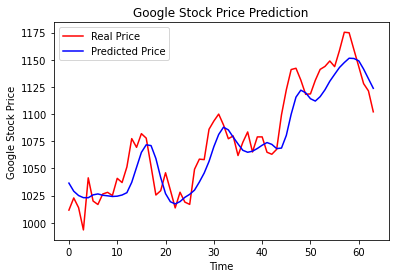

In [ ]:
plt.plot(real_stock_price,color = 'red', label = 'Real Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()